In [1]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from matplotlib import pyplot as plt
%matplotlib inline
"""from cv2 import cv2.imshow"""

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [2]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg

--2020-04-17 11:41:32--  http://images.cocodataset.org/val2017/000000439715.jpg
Resolviendo images.cocodataset.org (images.cocodataset.org)... 52.216.26.140
Conectando con images.cocodataset.org (images.cocodataset.org)[52.216.26.140]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 209222 (204K) [image/jpeg]
Guardando como: “input.jpg”

input.jpg           100%[===================>] 204,32K   576KB/s    en 0,4s    

2020-04-17 11:41:32 (576 KB/s) - “input.jpg” guardado [209222/209222]



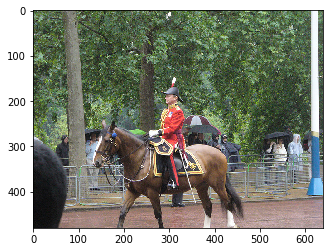

In [3]:
im = cv2.imread("./input.jpg")
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()

In [4]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

In [5]:
outputs["instances"].pred_classes
outputs["instances"].pred_boxes

Boxes(tensor([[124.6295, 246.0557, 464.5742, 480.0000],
        [250.5952, 157.1196, 339.5726, 408.2430],
        [ 49.3507, 274.3743,  80.1645, 342.3899],
        [  0.0000, 284.6656,  78.5014, 478.5183],
        [386.0469, 270.9829, 411.8350, 303.1007],
        [334.2235, 251.3125, 414.0236, 277.6147],
        [331.4684, 231.2237, 393.7103, 257.4648],
        [561.0322, 271.5619, 594.9163, 390.1007],
        [512.4011, 276.6875, 563.4662, 389.4290],
        [329.3685, 230.3823, 402.1460, 278.3009],
        [526.8882, 277.4477, 561.6942, 344.5835],
        [114.9140, 268.0703, 145.6501, 397.1750],
        [113.1451, 267.1151, 159.3603, 395.6356]], device='cuda:0'))

# Prueba con modelo ya entrenado
## Detección de animales

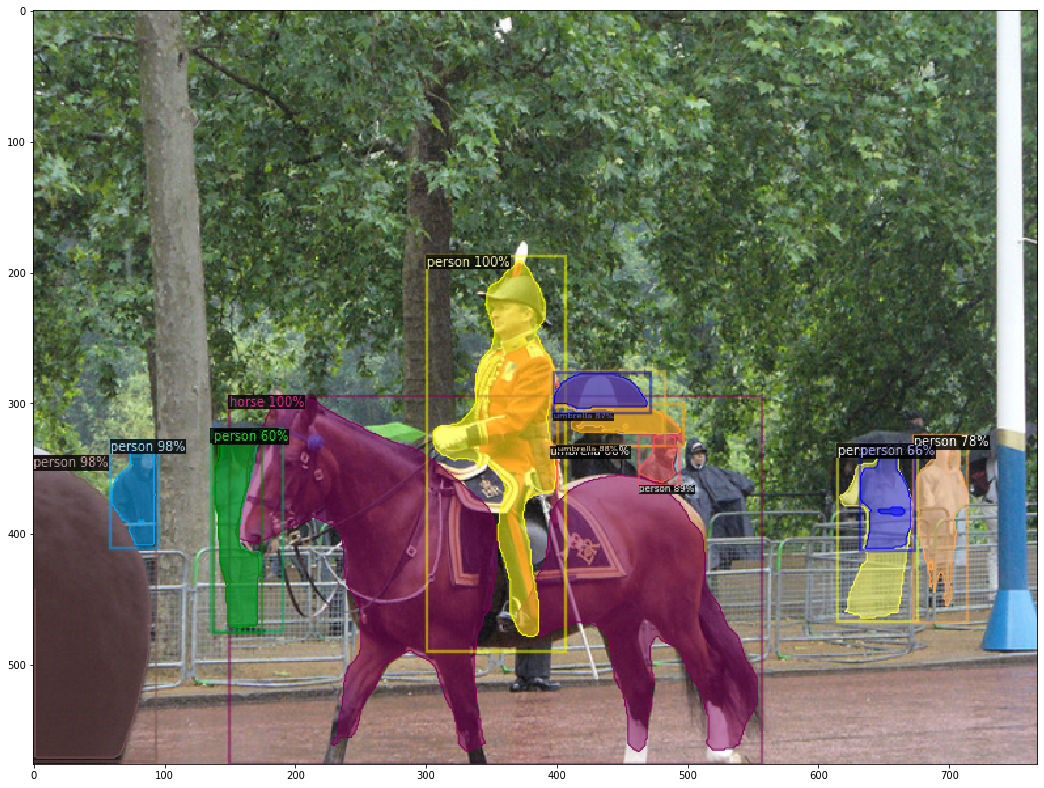

In [6]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
imVisualizer = v.get_image()[:, :, ::-1]
plt.figure(figsize=(18, 16))
plt.imshow(imVisualizer)
plt.show()

## Detección de la posición

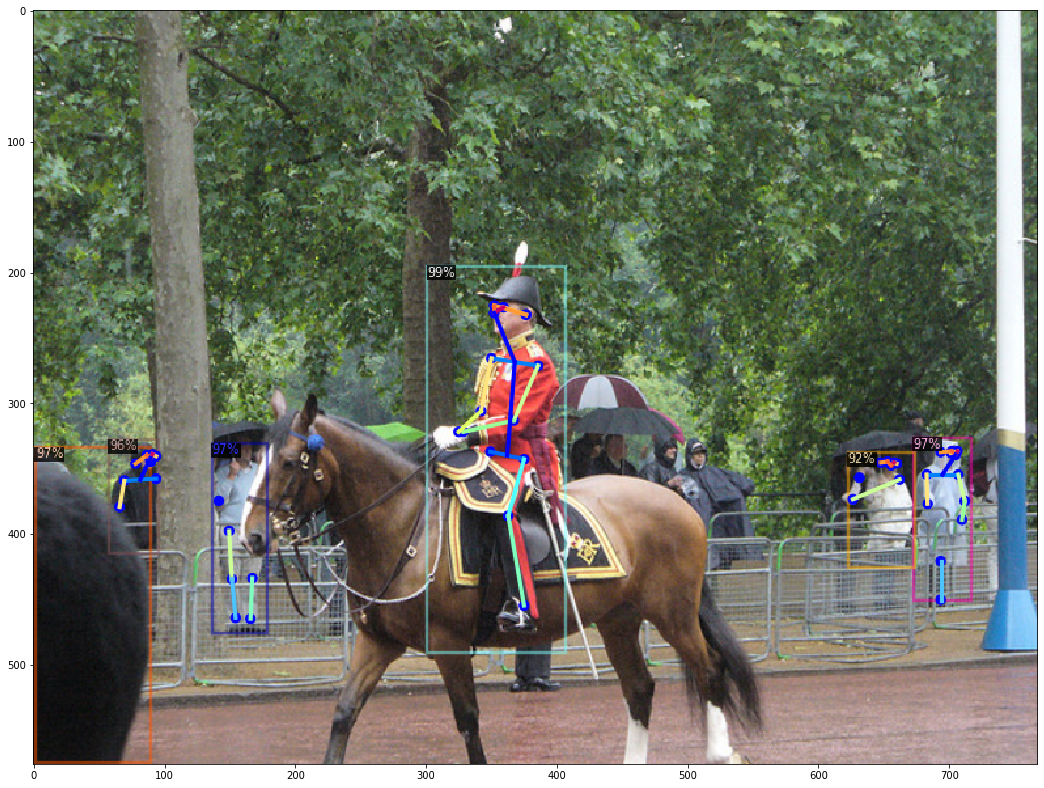

In [7]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
imVisualizer = v.get_image()[:, :, ::-1]
plt.figure(figsize=(18, 16))
plt.imshow(imVisualizer)
plt.show()

# Pruebas con vídeos grabados

In [30]:
from PIL import Image

vc = cv2.VideoCapture('videos-prueba/Videos/Josemi/sentado3-caja.webm')

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

if (vc.isOpened()==False):
    print("Error")

(grabbed, frame) = vc.read()
fshape = frame.shape
fheight = fshape[0]
fwidth = fshape[1]
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('videos-prueba/pruebaA.mp4',fourcc, 15.0, (fwidth,fheight))
    
i = 0
#fourcc = cv2.VideoWriter_fourcc(*'XVID')
#out = cv2.VideoWriter('videos-prueba/prueba.avi',fourcc,15.0,(1280,720))

while(vc.isOpened()):
    ret,frame = vc.read()
    if i%2==0:
        if ret == True:
            outputs = predictor(frame)
            v = Visualizer(frame[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
            v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
            imVisualizer = cv2.cvtColor(v.get_image()[:, :, ::-1],cv2.COLOR_BGR2RGB)
            #im = Image.fromarray(imVisualizer)
            #out.write(np.array(im))
            out.write(imVisualizer)
        else:
            break
    i+=1

vc.release()
out.release()
cv2.destroyAllWindows()

In [28]:
type(imVisualizer)

numpy.ndarray

In [23]:
img = cv2.imread("prueba.jpeg")

In [26]:
type(img)

numpy.ndarray

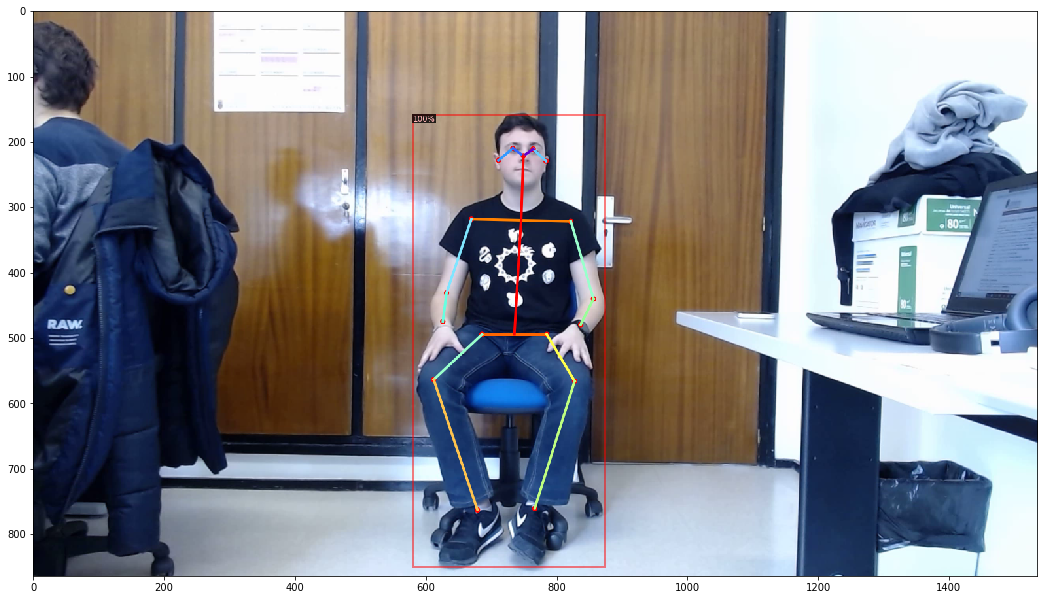

In [10]:
#Leo un frame
vc = cv2.VideoCapture('videos-prueba/Videos/Josemi/sentado6-camiseta.webm')

if (vc.isOpened()==False):
    print("Error")
else:
        ret,frame = vc.read()

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.99  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(frame)
v = Visualizer(frame[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v2 = v.draw_instance_predictions(outputs["instances"].to("cpu"))
imVisualizer = cv2.cvtColor(v2.get_image()[:, :, ::-1],cv2.COLOR_BGR2RGB)
plt.figure(figsize=(18, 16))
plt.imshow(imVisualizer)
plt.show()

In [7]:
outputs.get("instances")._fields

{'pred_boxes': Boxes(tensor([[483.9923, 133.0350, 727.7599, 708.3063]], device='cuda:0')),
 'scores': tensor([0.9996], device='cuda:0'),
 'pred_classes': tensor([0], device='cuda:0'),
 'pred_keypoints': tensor([[[6.2459e+02, 1.8529e+02, 1.7179e+00],
          [6.3707e+02, 1.7666e+02, 1.5850e+00],
          [6.1115e+02, 1.7570e+02, 1.6507e+00],
          [6.5338e+02, 1.9200e+02, 1.1250e+00],
          [5.9292e+02, 1.9104e+02, 1.1029e+00],
          [6.8505e+02, 2.6870e+02, 3.3246e-01],
          [5.5837e+02, 2.6583e+02, 4.6170e-01],
          [7.1384e+02, 3.6746e+02, 6.2767e-01],
          [5.2670e+02, 3.5979e+02, 5.3621e-01],
          [6.9753e+02, 4.0006e+02, 9.5402e-01],
          [5.2190e+02, 3.9622e+02, 4.5298e-01],
          [6.5434e+02, 4.1252e+02, 1.4408e-01],
          [5.7181e+02, 4.1252e+02, 1.7302e-01],
          [6.8985e+02, 4.7197e+02, 4.1661e-01],
          [5.1038e+02, 4.7005e+02, 3.7885e-01],
          [6.3899e+02, 6.3400e+02, 1.6858e-01],
          [5.6605e+02, 6.3592e

In [9]:
#Leo un segundo frame

#Leo 200 frames más tarde
c=200
for i in range(c):
    if (vc.isOpened()==False):
        print("Error")
    else:
            ret,frame = vc.read()

outputs2 = predictor(frame)
v = Visualizer(frame[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v2 = v.draw_instance_predictions(outputs2["instances"].to("cpu"))
imVisualizer = cv2.cvtColor(v2.get_image()[:, :, ::-1],cv2.COLOR_BGR2RGB)
plt.figure(figsize=(18, 16))
plt.imshow(imVisualizer)
plt.show()

vc.release()

AttributeError: 'NoneType' object has no attribute 'shape'

In [84]:
type(outputs)
i = outputs.get("instances")
j = outputs2.get("instances")
pk = i.pred_keypoints
pk2 = j.pred_keypoints

In [86]:
pk2

tensor([[[6.1666e+02, 1.7041e+02, 3.8158e+00],
         [6.2912e+02, 1.5889e+02, 5.0902e+00],
         [6.0323e+02, 1.5889e+02, 5.3240e+00],
         [6.5213e+02, 1.6849e+02, 1.1827e+00],
         [5.8598e+02, 1.7041e+02, 1.4271e+00],
         [6.8760e+02, 2.2895e+02, 2.5492e-01],
         [5.5243e+02, 2.3183e+02, 3.0437e-01],
         [7.5949e+02, 1.5889e+02, 7.6538e-01],
         [4.6998e+02, 1.6081e+02, 6.2815e-01],
         [7.1060e+02, 8.5002e+01, 8.3081e-01],
         [5.1696e+02, 8.7881e+01, 9.7219e-01],
         [6.6171e+02, 4.0072e+02, 2.5758e-01],
         [5.6872e+02, 3.9688e+02, 3.1221e-01],
         [6.6842e+02, 4.8517e+02, 4.4736e-01],
         [5.3421e+02, 4.8229e+02, 6.1305e-01],
         [5.8119e+02, 6.3871e+02, 2.4978e-01],
         [6.0611e+02, 6.2431e+02, 2.1284e-01]],

        [[5.9848e+01, 4.7480e+01, 5.0357e-02],
         [1.4926e+00, 4.7959e-01, 2.0571e-02],
         [5.3151e+01, 4.7480e+01, 3.5677e-02],
         [1.4926e+00, 7.5296e+01, 2.7783e-02],
         [5

In [94]:
list(pk2[0][:,0].cpu())

[tensor(616.6561),
 tensor(629.1185),
 tensor(603.2350),
 tensor(652.1262),
 tensor(585.9793),
 tensor(687.5963),
 tensor(552.4266),
 tensor(759.4950),
 tensor(469.9826),
 tensor(710.6038),
 tensor(516.9565),
 tensor(661.7126),
 tensor(568.7236),
 tensor(668.4232),
 tensor(534.2122),
 tensor(581.1860),
 tensor(606.1110)]

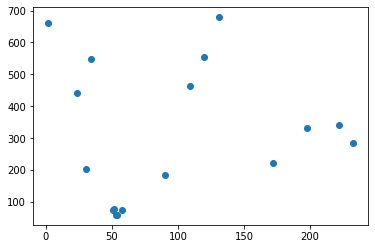

In [98]:
plt.scatter(pk2[2][:,0].cpu(),pk2[2][:,1].cpu())

In [85]:
pk

tensor([[[6.3119e+02, 1.6160e+02, 9.9789e-01],
         [6.4460e+02, 1.5296e+02, 1.1907e+00],
         [6.1682e+02, 1.5104e+02, 1.1469e+00],
         [6.5610e+02, 1.6928e+02, 1.1443e+00],
         [5.9191e+02, 1.6736e+02, 1.1553e+00],
         [6.9634e+02, 2.5374e+02, 2.7699e-01],
         [5.4496e+02, 2.5374e+02, 2.9935e-01],
         [7.2892e+02, 3.4109e+02, 3.7201e-01],
         [5.0567e+02, 3.4493e+02, 3.3722e-01],
         [7.0113e+02, 3.6604e+02, 4.7088e-01],
         [5.2675e+02, 3.6604e+02, 4.4947e-01],
         [6.5898e+02, 4.0828e+02, 1.6542e-01],
         [5.6508e+02, 3.9772e+02, 1.2823e-01],
         [6.7335e+02, 4.8219e+02, 4.5277e-01],
         [5.3538e+02, 4.8219e+02, 4.4121e-01],
         [5.8328e+02, 6.4248e+02, 2.2929e-01],
         [6.1107e+02, 6.3384e+02, 1.9414e-01]],

        [[4.7836e-01, 6.1502e+01, 1.0860e-01],
         [4.7836e-01, 7.2009e+01, 1.9542e-01],
         [4.7836e-01, 7.2009e+01, 1.1676e-01],
         [4.7836e-01, 6.4368e+01, 4.2264e-02],
         [9

In [59]:
for i in pk:
    print(i.data)
    #for j in i:
    #    print(j)
    print("\n")

tensor([[6.3119e+02, 1.6160e+02, 9.9789e-01],
        [6.4460e+02, 1.5296e+02, 1.1907e+00],
        [6.1682e+02, 1.5104e+02, 1.1469e+00],
        [6.5610e+02, 1.6928e+02, 1.1443e+00],
        [5.9191e+02, 1.6736e+02, 1.1553e+00],
        [6.9634e+02, 2.5374e+02, 2.7699e-01],
        [5.4496e+02, 2.5374e+02, 2.9935e-01],
        [7.2892e+02, 3.4109e+02, 3.7201e-01],
        [5.0567e+02, 3.4493e+02, 3.3722e-01],
        [7.0113e+02, 3.6604e+02, 4.7088e-01],
        [5.2675e+02, 3.6604e+02, 4.4947e-01],
        [6.5898e+02, 4.0828e+02, 1.6542e-01],
        [5.6508e+02, 3.9772e+02, 1.2823e-01],
        [6.7335e+02, 4.8219e+02, 4.5277e-01],
        [5.3538e+02, 4.8219e+02, 4.4121e-01],
        [5.8328e+02, 6.4248e+02, 2.2929e-01],
        [6.1107e+02, 6.3384e+02, 1.9414e-01]], device='cuda:0')


tensor([[4.7836e-01, 6.1502e+01, 1.0860e-01],
        [4.7836e-01, 7.2009e+01, 1.9542e-01],
        [4.7836e-01, 7.2009e+01, 1.1676e-01],
        [4.7836e-01, 6.4368e+01, 4.2264e-02],
        [9.088

In [62]:
pk[0].device

device(type='cuda', index=0)

In [57]:
for i in pk:
    print(type(i))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [40]:
i._fields

{'pred_boxes': Boxes(tensor([[487.9490, 104.4865, 753.3510, 708.2303],
         [  0.0000,  56.2490,  99.4982, 177.5549],
         [  0.0000,  84.2674, 262.7524, 704.4506]], device='cuda:0')),
 'scores': tensor([0.9997, 0.9577, 0.9003], device='cuda:0'),
 'pred_classes': tensor([0, 0, 0], device='cuda:0'),
 'pred_keypoints': tensor([[[6.3119e+02, 1.6160e+02, 9.9789e-01],
          [6.4460e+02, 1.5296e+02, 1.1907e+00],
          [6.1682e+02, 1.5104e+02, 1.1469e+00],
          [6.5610e+02, 1.6928e+02, 1.1443e+00],
          [5.9191e+02, 1.6736e+02, 1.1553e+00],
          [6.9634e+02, 2.5374e+02, 2.7699e-01],
          [5.4496e+02, 2.5374e+02, 2.9935e-01],
          [7.2892e+02, 3.4109e+02, 3.7201e-01],
          [5.0567e+02, 3.4493e+02, 3.3722e-01],
          [7.0113e+02, 3.6604e+02, 4.7088e-01],
          [5.2675e+02, 3.6604e+02, 4.4947e-01],
          [6.5898e+02, 4.0828e+02, 1.6542e-01],
          [5.6508e+02, 3.9772e+02, 1.2823e-01],
          [6.7335e+02, 4.8219e+02, 4.5277e-01],
  

In [45]:
ps = outputs.get("panoptic_seg")
type(ps)

NoneType

In [99]:
frame

array([[[ 55,  46,  57],
        [ 49,  40,  51],
        [ 36,  29,  40],
        ...,
        [255, 253, 236],
        [255, 253, 236],
        [255, 253, 236]],

       [[ 50,  41,  52],
        [ 48,  39,  50],
        [ 39,  32,  43],
        ...,
        [255, 253, 236],
        [255, 253, 236],
        [255, 253, 236]],

       [[ 46,  42,  52],
        [ 45,  41,  51],
        [ 44,  39,  51],
        ...,
        [255, 253, 236],
        [255, 253, 236],
        [255, 253, 236]],

       ...,

       [[  5,   2,   1],
        [  5,   2,   1],
        [  5,   2,   1],
        ...,
        [254, 231, 150],
        [254, 231, 150],
        [254, 231, 150]],

       [[  5,   2,   1],
        [  5,   2,   1],
        [  5,   2,   1],
        ...,
        [255, 230, 149],
        [255, 230, 149],
        [255, 230, 149]],

       [[  5,   2,   1],
        [  5,   2,   1],
        [  5,   2,   1],
        ...,
        [255, 230, 149],
        [255, 230, 149],
        [255, 230, 149]]

In [104]:
from PIL import Image
im = Image.fromarray(frame)
cv2.imwrite("p.jpeg",frame)

True

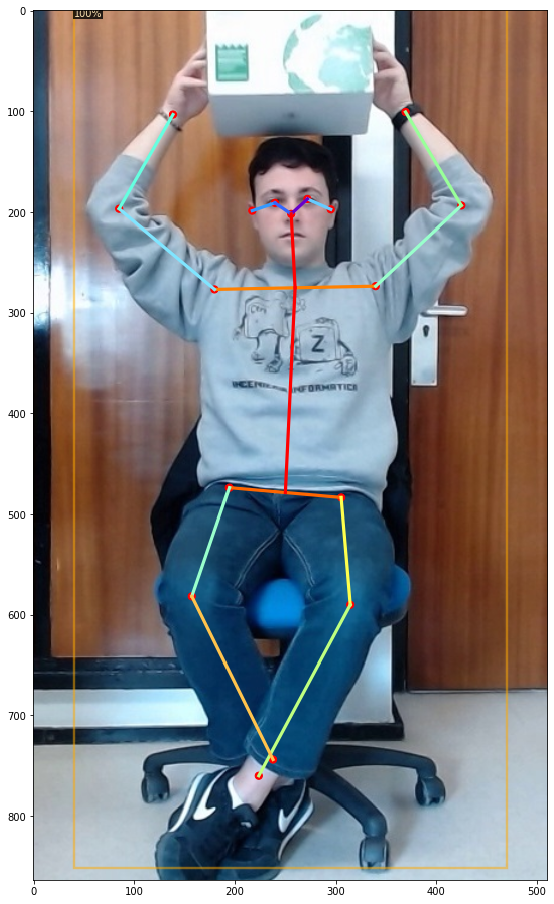

In [136]:
frame = cv2.imread("p.jpeg")

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs3 = predictor(frame)
v = Visualizer(frame[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v2 = v.draw_instance_predictions(outputs3["instances"].to("cpu"))
imVisualizer = cv2.cvtColor(v2.get_image()[:, :, ::-1],cv2.COLOR_BGR2RGB)
plt.figure(figsize=(18, 16))
plt.imshow(imVisualizer)
plt.show()

In [137]:
type(outputs)
k = outputs3.get("instances")

pk3 = k.pred_keypoints
sc3 = k.scores
pc3 = k.pred_classes

(900, 0)

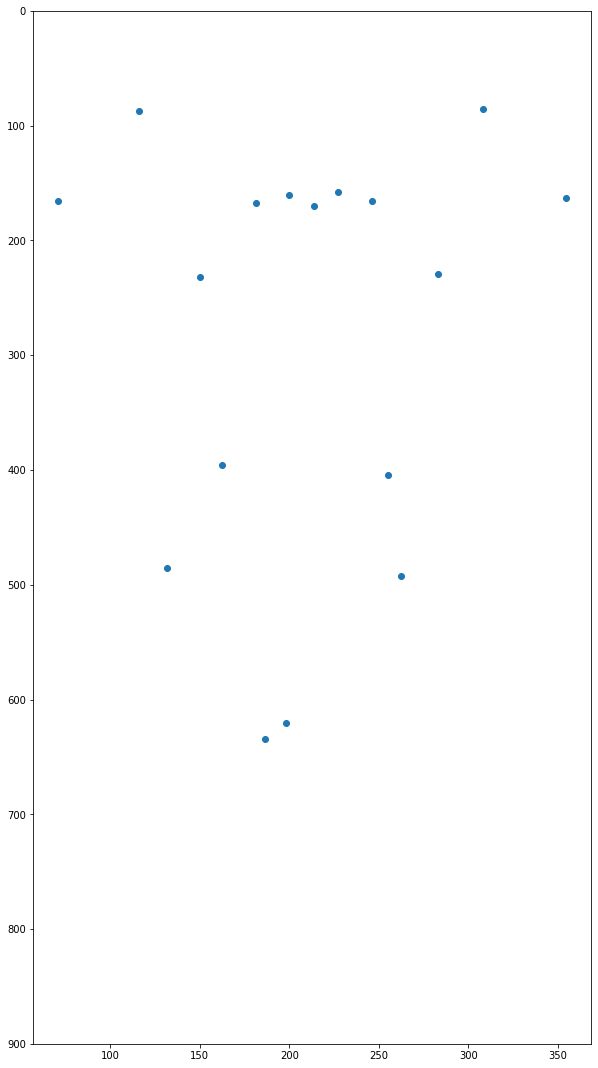

In [138]:
plt.figure(figsize=(10,19))
plt.scatter(pk3[0][:,0].cpu(),pk3[0][:,1].cpu())
plt.ylim(900,0)

In [139]:
k._fields

{'pred_boxes': Boxes(tensor([[ 34.0324,   0.0000, 391.3303, 709.9225]], device='cuda:0')),
 'scores': tensor([0.9993], device='cuda:0'),
 'pred_classes': tensor([0], device='cuda:0'),
 'pred_keypoints': tensor([[[2.1349e+02, 1.6979e+02, 1.5867e+00],
          [2.2698e+02, 1.5737e+02, 1.1741e+00],
          [2.0000e+02, 1.6061e+02, 1.7991e+00],
          [2.4641e+02, 1.6601e+02, 2.5812e+00],
          [1.8111e+02, 1.6709e+02, 2.7865e+00],
          [2.8312e+02, 2.2917e+02, 5.6033e-01],
          [1.5034e+02, 2.3187e+02, 4.6595e-01],
          [3.5436e+02, 1.6277e+02, 5.9296e-01],
          [7.1004e+01, 1.6547e+02, 6.8480e-01],
          [3.0794e+02, 8.5029e+01, 8.9593e-01],
          [1.1580e+02, 8.7188e+01, 1.2494e+00],
          [2.5505e+02, 4.0409e+02, 4.3644e-01],
          [1.6222e+02, 3.9599e+02, 4.1282e-01],
          [2.6261e+02, 4.9263e+02, 7.8155e-01],
          [1.3145e+02, 4.8561e+02, 4.9456e-01],
          [1.8650e+02, 6.3407e+02, 2.1998e-01],
          [1.9838e+02, 6.2057e

In [125]:
pk3

tensor([[[2.1349e+02, 1.6979e+02, 1.5867e+00],
         [2.2698e+02, 1.5737e+02, 1.1741e+00],
         [2.0000e+02, 1.6061e+02, 1.7991e+00],
         [2.4641e+02, 1.6601e+02, 2.5812e+00],
         [1.8111e+02, 1.6709e+02, 2.7865e+00],
         [2.8312e+02, 2.2917e+02, 5.6033e-01],
         [1.5034e+02, 2.3187e+02, 4.6595e-01],
         [3.5436e+02, 1.6277e+02, 5.9296e-01],
         [7.1004e+01, 1.6547e+02, 6.8480e-01],
         [3.0794e+02, 8.5029e+01, 8.9593e-01],
         [1.1580e+02, 8.7188e+01, 1.2494e+00],
         [2.5505e+02, 4.0409e+02, 4.3644e-01],
         [1.6222e+02, 3.9599e+02, 4.1282e-01],
         [2.6261e+02, 4.9263e+02, 7.8155e-01],
         [1.3145e+02, 4.8561e+02, 4.9456e-01],
         [1.8650e+02, 6.3407e+02, 2.1998e-01],
         [1.9838e+02, 6.2057e+02, 1.6801e-01]],

        [[9.0673e+01, 2.0273e+02, 4.0568e-02],
         [1.1331e+02, 7.1260e+02, 3.4863e-02],
         [1.8823e+02, 3.9015e+02, 3.0282e-02],
         [3.2998e+02, 2.0273e+02, 5.6571e-02],
         [1

In [110]:
sc3

tensor([0.9993, 0.8132], device='cuda:0')

In [112]:
pc3

tensor([0, 0], device='cuda:0')

In [ ]:
vc = cv2.VideoCapture('videos-prueba/Videos/Josemi/sentado3-caja.webm')

if (vc.isOpened()==False):
    print("Error")
else:
        ret,frame = vc.read()

cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(frame)

w = Visualizer(frame[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
w = w.draw_instance_predictions(outputs["instances"].to("cpu"))
imVisualizer = cv2.cvtColor(w.get_image()[:, :, ::-1],cv2.COLOR_BGR2RGB)
plt.figure(figsize=(18, 16))
plt.imshow(imVisualizer)
plt.show()

vc.release()